In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sunpy.map import Map
import skimage.transform


In [2]:
mask = np.ones((1024,1024))
mask[990:,:300] = 0.

def read_hmi_jpg(file_name):
    x = plt.imread(file_name)
    x = x.mean(axis=2)
    x *= mask
    x /= 255.
    return x

In [3]:
def rescale(X, scale_factor):
    t = (X.shape[0]/2.0)-scale_factor*(X.shape[0]/2.0)
    #rescale and keep center
    XForm = skimage.transform.SimilarityTransform(scale=scale_factor,translation=(t,t))
    Xr = skimage.transform.warp(X,XForm.inverse,preserve_range=True,mode='edge',output_shape=(X.shape[0],X.shape[0]))
    return Xr

def aia_to_hmi_scale_factor(aia_scale_factor):
    # Based on AIA 0131 channel
    return aia_scale_factor * 0.85

In [17]:
# aia_file = '/disk2-ssd-8tb/data/sdoml-lite-biosentinel-raw/2024/01/01/AIA20240101_0000_0131.fits'
# hmi_file = '/disk2-ssd-8tb/data/sdoml-lite-biosentinel-raw/2024/01/01/20240101_000000_M_1k.jpg'

aia_file = '/disk2-ssd-8tb/data/sdoml-lite-biosentinel-raw/2024/05/01/AIA20240501_0000_0131.fits'
hmi_file = '/disk2-ssd-8tb/data/sdoml-lite-biosentinel-raw/2024/05/01/20240501_000000_M_1k.jpg'

In [19]:
aia = Map(aia_file)
aia_data = aia.data
aia_r_sun_obs = aia.meta['RSUN_OBS']
trgtAS = 976.0
aia_scale_factor = trgtAS/aia_r_sun_obs
print(aia_r_sun_obs, aia_scale_factor)

952.5313184768349 1.0246382256078395


In [20]:
hmi_data = read_hmi_jpg(hmi_file)
hmi_scale_factor = aia_to_hmi_scale_factor(aia_scale_factor)
print(hmi_scale_factor)

0.8709424917666635


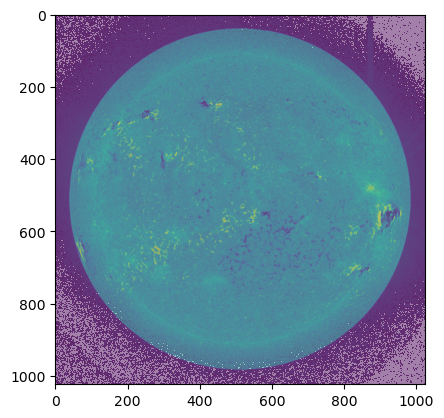

In [21]:
plt.imshow(aia_data, norm='log', alpha=0.7)
plt.imshow(hmi_data, alpha=0.5)

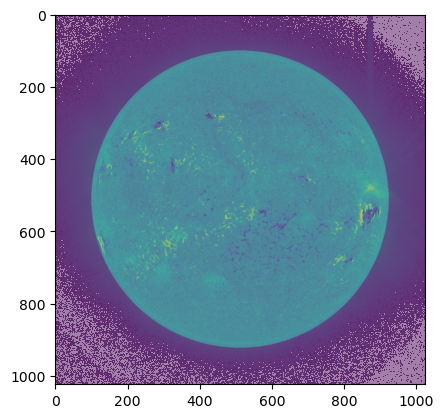

In [22]:
aia_data_rescaled = rescale(aia_data, aia_scale_factor)
hmi_data_rescaled = rescale(hmi_data, hmi_scale_factor)
plt.imshow(aia_data, norm='log', alpha=0.7)
plt.imshow(hmi_data_rescaled, alpha=0.5)

In [23]:
plt.imsave('aia_2.png', np.log(np.clip(aia_data, a_min=0., a_max=1e10)+1e-6))
plt.imsave('hmi_2.png', hmi_data)
plt.imsave('aia_rescaled_2.png', np.log(np.clip(aia_data_rescaled, a_min=0., a_max=1e10)+1e-6))
plt.imsave('hmi_rescaled_2.png', hmi_data_rescaled)